Code belows are following this kaggle :  https://www.kaggle.com/dansbecker/xgboost

In [ ]:
#import necessary libraries for the code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
import math
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [22]:
# Read the data into a data frame
df = pd.read_csv('kc_house_data.csv')

In [23]:
# Check the number of data points in the data set
print(len(df))
# Check the number of features in the data set
print(len(df.columns))
# Check the data types
print(df.dtypes.unique())

21613
21
[dtype('int64') dtype('O') dtype('float64')]


In [24]:
df.select_dtypes(include=['O']).columns.tolist()

['date']

#### Date is in timestamp format , hence will be ignored

In [26]:
# Check any number of columns with NaN
print(df.isnull().any().sum(), ' / ', len(df.columns))
# Check any number of data points with NaN
print(df.isnull().any(axis=1).sum(), ' / ', len(df))

0  /  21
0  /  21613


In [27]:
features = df.iloc[:,3:].columns.tolist()
target = df.iloc[:,2].name

In [28]:
correlations = {}
for f in features:
    temp_df = df[[f,target]]
    x1 = temp_df[f].values
    x2 = temp_df[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]


In [29]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


In [31]:
y = df.loc[:,['sqft_living','grade',target]].sort_values(target, ascending=True).values
x = np.arange(y.shape[0])

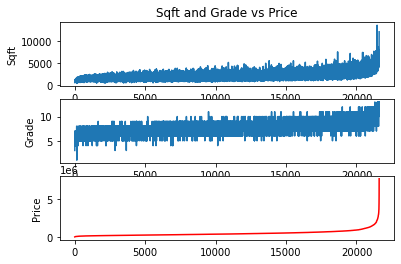

In [33]:
#Plot top correlations 

%matplotlib inline
plt.subplot(3,1,1)
plt.plot(x,y[:,0])
plt.title('Sqft and Grade vs Price')
plt.ylabel('Sqft')

plt.subplot(3,1,2)
plt.plot(x,y[:,1])
plt.ylabel('Grade')

plt.subplot(3,1,3)
plt.plot(x,y[:,2],'r')
plt.ylabel("Price")

plt.show()

In [35]:
import sklearn
from sklearn import linear_model
# Train a simple linear regression model
regr = linear_model.LinearRegression()
new_data = df[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms']]


In [36]:
X = new_data.values
y = df.price.values

In [37]:
#Split the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [38]:
regr.fit(X_test,y_test)

LinearRegression()

In [39]:
# Calculate the Root Mean Squared Error
print("RMSE: %.2f"
      % math.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2)))

RMSE: 216989.65


In [40]:
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [41]:
traindf, testdf = train_test_split(X_train, test_size = 0.3)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.7948751929938533


Prediction accuracy is 79%, this number could be improved by selecting combinations of other features .